In [ ]:
from torchvision.datasets import CIFAR10
from torchvision import transforms
import torchvision
import torch

In [ ]:
from transformers import AutoProcessor, AutoModel

In [ ]:
model = AutoModel.from_pretrained("google/siglip-base-patch16-224")
processor = AutoProcessor.from_pretrained("google/siglip-base-patch16-224")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def get_text_probs_test(X, y, size=-1):
  if size == -1:
    size = X.shape[0]
  probs = []
  names = []
  for i in range(size):
      inputs = processor(text=labels, images=X[i], padding="max_length", return_tensors="pt")
      outputs = model(**inputs)
      logits_per_image = outputs.logits_per_image
      probs.append(torch.sigmoid(logits_per_image))
      names.append(y[i])
  return names, probs


In [ ]:
names, probs = get_text_probs_test(X_test, y_test, size=10)

In [ ]:
def accuracy(names, probs, k=1):
  right = 0
  for name, p in zip(names, probs):
    _, top = p.clone().detach().topk(k, dim=-1)
    result = tf.reduce_any(tf.equal(top, int(name))).numpy()
    if result:
      right += 1
  return right / len(names)

In [ ]:
accuracy(names, probs)

<ipython-input-10-196eafe2e289>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result = tf.reduce_any(tf.equal(top, int(name))).numpy()


0.9

In [ ]:
def show_img(result, names, true, img):
  plt.imshow(img, cmap=plt.cm.binary)
  color = 'g' if int(result) == int(true) else 'r'
  plt.xlabel(f"{labels[int(result)]} ({labels[int(true)]})", color=color)

In [ ]:
def show_bar(p, true):
    plt.yticks([])
    plt.xticks(range(10))
    plot = plt.bar(range(10), p.tolist()[0])
    plot[int(true)].set_color('g')

In [ ]:
def show_all(names, probs, X, y):
    cols = 4
    rows = len(names) // cols if len(names) % cols == 0 else len(names) // cols + 1
    plt.figure(figsize=(2 * 2 * cols, 2 * rows))
    plt.figure(figsize=(2 * 2 * cols, 2 * rows))
    for i in range(len(names)):
      _, top = probs[i].clone().detach().topk(k=1, dim=-1)
      result = tf.reduce_any(tf.equal(top, int(names[i]))).numpy()
      plt.subplot(rows, 2 * cols, 2 * i + 1)
      show_img(top.tolist()[0][0], names, y[i], X[i])
      plt.subplot(rows, 2 * cols, 2 * i + 2)
      show_bar(probs[i], y[i])
    plt.tight_layout()
    plt.show()

<ipython-input-26-0e1fb592dd9c>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result = tf.reduce_any(tf.equal(top, int(names[i]))).numpy()
<ipython-input-22-be5403af72f6>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  color = 'g' if int(result) == int(true) else 'r'
<ipython-input-22-be5403af72f6>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(result)]} ({labels[int(true)]})", color=color)
<ipython-input-32-7f3b52acf333>:5: Deprecati

<Figure size 1600x600 with 0 Axes>

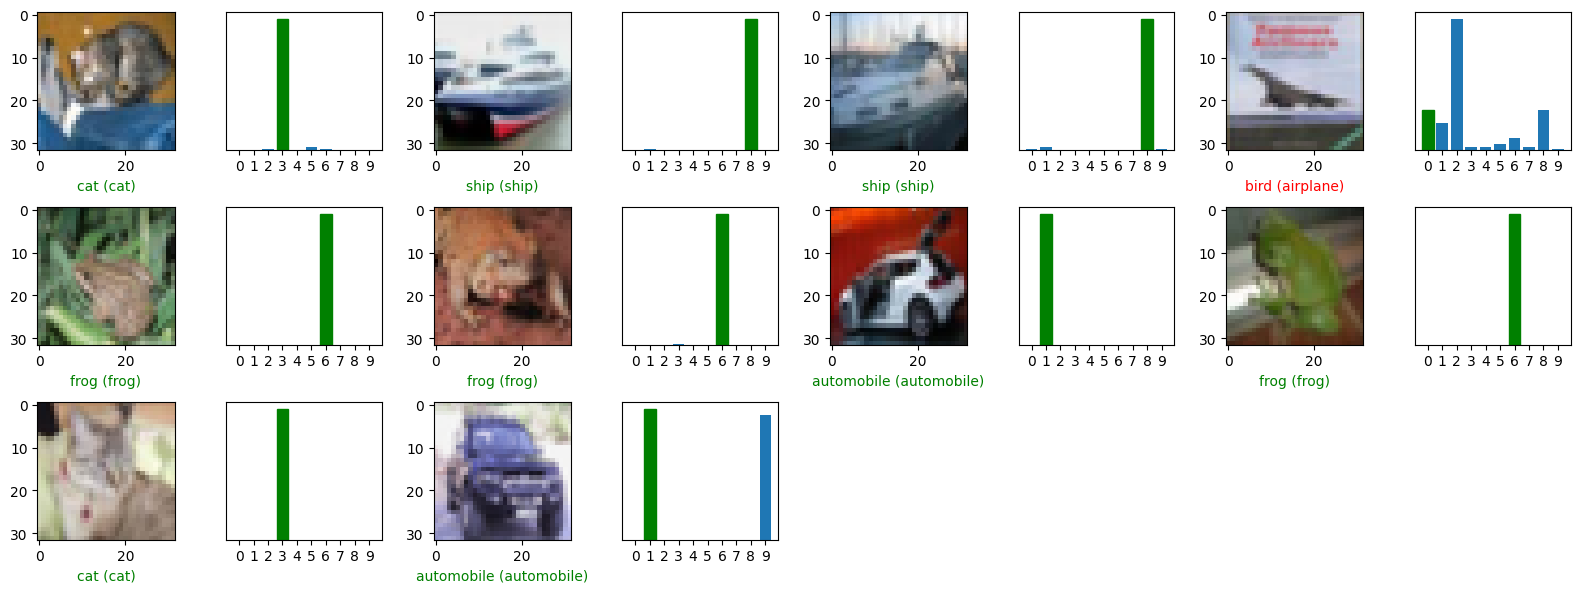

In [ ]:
show_all(names, probs, X_test, y_test)